In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os, sys
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import statsmodels.stats.api as sms

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
path = '/nfs/turbo/umms-awaljee/wsliu/Data/NRD/'

In [3]:
module_path = '/home/wsliu/Codes/DLproj'
if module_path not in sys.path:
    sys.path.append(module_path)
if module_path+'/NRD' not in sys.path:
    sys.path.append(module_path+'/NRD')

In [4]:
from ccs_tools import core_dtypes_pd
from utils import preprocess

Using TensorFlow backend.


## Prepare hyper-parameters and generate the .sh files

For embedding+NN with a subset of codes:

In [13]:
!rm hypertune*.sh

In [9]:
model_names = ['setsum_nn']
code_embed_dims = [200]
fc_widths = [512]
md_widths = [128]
lr1s = [2e-4]
#lr2s = [2e-5]
dropouts = [0.3]
batchsizes = [128, 256, 512]
embed_mats = ['random']
#penalties = [0, 0.5, 1.]
#penalty_metrics = ['cosine']
#count_caps = [0, 5, 20]
tst_seeds = [0]
cohorts = ['ami']
#DX_rarecutpoints = [20]
#PR_rarecutpoints = [drp/2 for drp in DX_rarecutpoints]
val_seeds = range(5)
lambs = [15., 25.]
n_sampless = [250, 350, 400]
result_files = ['output/ht_result1212_{}.csv']

In [10]:
para_itr = itertools.product(model_names, code_embed_dims, fc_widths, md_widths, lr1s, dropouts, batchsizes, embed_mats, 
                            tst_seeds, cohorts, val_seeds, lambs, n_sampless, result_files)
para_lst = [(mn, ced, fc, md, l1, do, bs, em, ts, ch, vs, la, ns, rf) 
            for mn, ced, fc, md, l1, do, bs, em, ts, ch, vs, la, ns, rf in para_itr]

In [11]:
len(para_lst)

90

In [14]:
n_jobs = 7
for para, job_ind in zip(para_lst, itertools.cycle(range(n_jobs))):
    with open('hypertune'+str(job_ind)+'.sh', 'a') as f:
        f.write('python template_skipgram1209.py --model_name {} --code_embed_dim {} --fc_width {} --md_width {} --lr1 {} --dropout {} --batchsize {} --embed_file {} --tst_seed {} --cohort {} --val_seed {} --lamb {} --n_samples {} --result_file {} --job_index {}\n'.format(*para, job_ind))

In [18]:
job_index = 10
for para in para_lst[:1]:
    with open('hypertune'+str(job_index)+'.sh', 'a') as f:
        f.write('python template_skipgram1209.py --model_name {} --code_embed_dim {} --fc_width {} --md_width {} --lr1 {} --dropout {} --batchsize {} --embed_file {} --tst_seed {} --cohort {} --val_seed {} --lamb {} --n_samples {} --result_file {} --job_index {}\n'.format(*para, job_index))

Random search:

In [4]:
n_sample = 33

In [5]:
model_names = np.random.choice(['setsum_nn'], n_sample)
code_embed_dims = np.random.choice([200, 300], n_sample)
fc_widths = np.random.choice([512, 1024], n_sample)
md_widths = np.random.choice([128, 256], n_sample)
lr1s = np.random.choice([2e-4], n_sample)
lr2s = np.random.choice([2e-5], n_sample)
dropouts = np.random.choice([0.3], n_sample)
batchsizes = np.random.choice([256, 512], n_sample)
embed_mats = np.random.choice(['pretrain'], n_sample)
penalties = np.random.choice([0, 0.5, 1.], n_sample)
penalty_metrics = np.random.choice(['cosine'], n_sample)
count_caps = np.random.choice([0, 5, 20], n_sample)
cohorts = np.random.choice(['ami'], n_sample)
DX_rarecutpoints = np.random.choice([20], n_sample)
PR_rarecutpoints = [int(drp/2) for drp in DX_rarecutpoints]
val_folds = np.random.choice([5], n_sample)
result_files = ['output/ht_result1001_{}.csv']*n_sample

zips = zip(model_names, code_embed_dims, fc_widths, md_widths, lr1s, lr2s, dropouts, batchsizes, embed_mats, 
                             penalties, penalty_metrics, count_caps, cohorts, DX_rarecutpoints, PR_rarecutpoints,
                             val_folds, result_files)
tst_seeds = range(10)

In [6]:
para_itr = itertools.product(zips, tst_seeds)

para_lst = [(*z, t) for z, t in para_itr]

In [7]:
len(para_lst)

330

In [8]:
n_jobs = 4
for para, job_ind in zip(para_lst, itertools.cycle(range(n_jobs))):
    with open('hypertune'+str(job_ind)+'.sh', 'a') as f:
        f.write('python train_template_sub0922.py --model_name {0} --code_embed_dim {1} --fc_width {2} --md_width {3} --lr1 {4} --lr2 {5} --dropout {6} --batchsize {7} --embed_file {8} --penalty {9} --penalty_metric {10} --count_cap {11} --cohort {12} --dx_rarecutpoint {13} --pr_rarecutpoint {14} --val_fold {15} --result_file {16} --tst_seed {17} --job_index {18}\n'.format(*para, job_ind))

For OHE:

In [2]:
!rm hypertune*.sh

In [3]:
fc_width1s = [1024]
fc_width2s = [256]
lrs = [1e-4]
dropouts = [0.3]
batchsizes = [512]
tst_seeds = range(10)
cohorts = ['ami', 'chf', 'pna']
val_folds = [5]
dx_rarecutpoints = [10]
pr_rarecutpoints = [10]
result_files = ['output/ht_result0925_{}.csv']

In [4]:
para_itr = itertools.product(fc_width1s, fc_width2s, lrs, dropouts, batchsizes, tst_seeds, cohorts, val_folds, 
                             dx_rarecutpoints, pr_rarecutpoints, result_files)

para_lst = list(para_itr)

In [5]:
len(para_lst)

30

In [6]:
n_jobs = 1
for para, job_ind in zip(para_lst, itertools.cycle(range(n_jobs))):
    with open('hypertune'+str(job_ind)+'.sh', 'a') as f:
        f.write('python train_template_ohe0925.py --fc_width1 {} --fc_width2 {} --lr {} --dropout {} --batchsize {} --tst_seed {} --cohort {} --val_fold {} --dx_rarecutpoint {} --pr_rarecutpoint {} --result_file {} --job_index {}\n'.format(*para, job_ind))

In [107]:
job_index = 5
for para in para_lst:
    with open('hypertune'+str(job_index)+'.sh', 'a') as f:
        f.write('python train_template_all0827.py --model_name {0} --code_embed_dim {1} --fc_width {2} --md_width {3} --lr1 {4} --lr2 {5} --dropout {6} --batchsize {7} --embed_file {8} --tst_seed {9} --cohort {10} --sep_dx1 {11} --val_fold {12} --result_file {13} --job_index {14}\n'.format(*para, job_index))

## Result Analysis

### Embedding + NN with all codes

In [2]:
res = pd.DataFrame()

In [3]:
for job_ind in range(8):
    df = pd.read_csv('output/ht_result1212_'+str(job_ind)+'.csv', 
                     names=['model_name', 'code_embed_dim', 'hosp_embed_dim', 'fc_width', 'md_width', 'lr1', 'dropout',
                            'batchsize', 'embed_file', 'cohort', 'tst_seed', 'val_seed', 'lamb', 'n_sample', 'auc', 'y_pred_file'], index_col=None)
    res = pd.concat([res, df])

In [11]:
res = res.assign(cohort_seed=res.cohort+res.tst_seed.apply(lambda x:str(x)))

In [4]:
res

model_name  code_embed_dim  hosp_embed_dim  fc_width  md_width     lr1  \
0  setsum_nn             200               1       512       128  0.0001   
1  setsum_nn             200               1       512       128  0.0001   
2  setsum_nn             200               1       512       128  0.0002   
3  setsum_nn             200               1       512       128  0.0002   
4  setsum_nn             200               1       512       128  0.0005   
5  setsum_nn             200               1       512       128  0.0005   
0  setsum_nn             200               1       512       128  0.0001   
1  setsum_nn             200               1       512       128  0.0001   
2  setsum_nn             200               1       512       128  0.0002   
3  setsum_nn             200               1       512       128  0.0002   
4  setsum_nn             200               1       512       128  0.0005   
5  setsum_nn             200               1       512       128  0.0005   
0  setsum_nn             200               1       512       128  0.0001   
1  setsum_nn             200               1       512       128  0.0001   
2  setsum_nn             200               1       512       128  0.0002   
3  setsum_nn             200               1       512       128  0.0002   
4  setsum_nn             200               1       512       128  0.0005   
5  setsum_nn             200               1       512       128  0.0005   
0  setsum_nn             200               1       512       128  0.0001   
1  setsum_nn             200               1       512       128  0.0001   
2  setsum_nn             200               1       512       128  0.0002   
3  setsum_nn             200               1       512       128  0.0002   
4  setsum_nn             200               1       512       128  0.0005   
5  setsum_nn             200               1       512       128  0.0005   
0  setsum_nn             200               1       512       128  0.0001   
1  setsum_nn             200               1       512       128  0.0001   
2  setsum_nn             200               1       512       128  0.0002   
3  setsum_nn             200               1       512       128  0.0002   
4  setsum_nn             200               1       512       128  0.0005   
0  setsum_nn             200               1       512       128  0.0001   
1  setsum_nn             200               1       512       128  0.0001   
2  setsum_nn             200               1       512       128  0.0002   
0  setsum_nn             200               1       512       128  0.0001   
1  setsum_nn             200               1       512       128  0.0002   
2  setsum_nn             200               1       512       128  0.0005   
3  setsum_nn             200               1       512       128  0.0005   
0  setsum_nn             200               1       512       128  0.0001   
1  setsum_nn             200               1       512       128  0.0001   
2  setsum_nn             200               1       512       128  0.0001   
3  setsum_nn             200               1       512       128  0.0001   
4  setsum_nn             200               1       512       128  0.0002   
5  setsum_nn             200               1       512       128  0.0005   
6  setsum_nn             200               1       512       128  0.0005   
0  setsum_nn             200               1       512       128  0.0001   
1  setsum_nn             200               1       512       128  0.0001   
2  setsum_nn             200               1       512       128  0.0002   
3  setsum_nn             200               1       512       128  0.0002   
4  setsum_nn             200               1       512       128  0.0005   
5  setsum_nn             200               1       512       128  0.0005   
0  setsum_nn             200               1       512       128  0.0001   
1  setsum_nn             200               1       512       128  0.0002   

   dropout  batchsize embed_file cohort  tst_seed

In [5]:
res_grouped = res.groupby(['n_sample', 'lamb', 'batchsize'])

The two-step training with GloVe can get auc_freeze 0.7158, and auc_finetune 0.7167, auc_avg 0.7196 on tst_seed 0.

In [7]:
show = res_grouped['auc'].agg(['mean', 'count'])

In [10]:
show.iloc[19:]

mean  count
n_sample lamb batchsize                 
250      25.0 256        0.713110      4
300      20.0 16         0.712996      5
              512        0.713332      5
         50.0 16         0.711488      5
              512        0.711418      5
350      15.0 128        0.712740      5
              256        0.712578      4
         25.0 128        0.712913      6
              256        0.712590      4
              512        0.711700      1
400      15.0 128        0.712320      6
              256        0.712157      4
         25.0 128        0.712430      6
              256        0.712103      3
500      5.0  512        0.711788      5
         10.0 512        0.712476      5
         30.0 512        0.712376      5
800      20.0 16         0.712190      5
         50.0 16         0.711565      4

In [15]:
res.to_csv('output/ht_result1210.csv', index=False)

In [7]:
for _, g in res_grouped:
    if g.auc_avg.mean() == res_grouped.auc_avg.mean().max():
        best = g

In [14]:
for n, g in res_grouped:
    print(n, 'freeze: {0:.4f} ({1:.4f})'.format(g.auc_freeze.mean(), g.auc_freeze.std()/np.sqrt(len(g))), 
         'mean: {0:.4f} ({1:.4f})'.format(g.auc_mean.mean(), g.auc_mean.std()/np.sqrt(len(g))), 
         'avg: {0:.4f} ({1:.4f})'.format(g.auc_avg.mean(), g.auc_avg.std()/np.sqrt(len(g))))

ami freeze: 0.7193 (0.0017) mean: 0.7202 (0.0017) avg: 0.7222 (0.0017)
chf freeze: 0.6298 (0.0015) mean: 0.6309 (0.0015) avg: 0.6337 (0.0015)
pna freeze: 0.6748 (0.0011) mean: 0.6758 (0.0011) avg: 0.6782 (0.0011)


In [10]:
res2 = pd.read_csv('output/ht_result0928embed_nn_sub.csv')

In [14]:
res2.loc[(res2.tst_seed==0) & (res2.DX_rarecutpoint==10)&(res2.PR_rarecutpoint==5)&(res2.count_cap==5)&(res2.penalty==0)]

model_name  code_embed_dim  hosp_embed_dim  fc_width  md_width     lr1  \
60     setsum             100               1       512       128  0.0002   

        lr2  dropout  batchsize embed_file  \
60  0.00002      0.3        256   pretrain   

                     ...                   n_fold  penalty  penalty_metric  \
60                   ...                        3      0.0          cosine   

    count_cap DX_rarecutpoint  PR_rarecutpoint  auc_mean  auc_avg  auc_freeze  \
60          5              10                5   0.71652  0.71957     0.71607   

                               y_pred_file  
60  output/y_pred_mat18_09_29_07_12_53.npy  

[1 rows x 22 columns]

In [12]:
res2.groupby(['DX_rarecutpoint', 'PR_rarecutpoint', 'penalty', 'count_cap'])[['auc_freeze', 'auc_mean', 'auc_avg']].agg(['mean', 'count'])

auc_freeze        auc_mean  \
                                                        mean count      mean   
DX_rarecutpoint PR_rarecutpoint penalty count_cap                              
0               0               0.0     5           0.715840    10  0.716669   
                                        100         0.716013    10  0.716834   
                                        500         0.716204    10  0.717220   
                                0.1     5           0.716347    10  0.717014   
                                        100         0.716614    10  0.717380   
                                        500         0.715653    10  0.717059   
                                0.5     5           0.716738    10  0.717823   
                                        100         0.715693    10  0.717198   
                                        500         0.713752    10  0.716295   
10              5               0.0     5           0.716178    10  0.716827   
                                        100         0.716100    10  0.717042   
                                        500         0.716341    10  0.717224   
                                0.1     5           0.716484    10  0.717391   
                                        100         0.716781    10  0.717785   
                                        500         0.715583    10  0.717200   
                                0.5     5           0.717004    10  0.717891   
                                        100         0.715679    10  0.717447   
                                        500         0.713264    10  0.716171   
20              10              0.0     5           0.715458    10  0.716425   
                                        100         0.716405    10  0.717102   
                                        500         0.715954    10  0.716995   
                                0.1     5           0.716243    10  0.717028   
                                        100         0.716810    10  0.717486   
                                        500         0.715678    10  0.717134   
                                0.5     5           0.717149    10  0.717726   
                                        100         0.715645    10  0.716895   
                                        500         0.713778    10  0.716195   
50              25              0.0     5           0.715594    10  0.716224   
                                        100         0.716259    10  0.716838   
                                        500         0.715740    10  0.716887   
                                0.1     5           0.716586    10  0.717316   
                                        100         0.716924    10  0.717645   
                                        500         0.716282    10  0.717310   
                                0.5     5           0.716803    10  0.717615   
                                        100         0.715631    10  0.717093   
                                        500         0.713750    10  0.716029   

                                                          auc_avg        
                                                  count      mean count  
DX_rarecutpoint PR_rarecutpoint penalty count_cap                        
0               0               0.0     5            10  0.719623    10  
                                        100          10  0.719555    10  
                                        500          10  0.719924    10  
                                0.1     5            10  0.719814    10  
                                        100          10  0.719987    10  
                                        500          10  0.719622    10  
                                0.5     5            10  0.720226    10  
                                        100          10  0.719665    10  
                                        500          10  0.718870    10  
10              5               0.0     5

In [5]:
res = pd.read_csv('output/ht_result1009penalty0.csv')

In [10]:
res = pd.concat([res, res2])

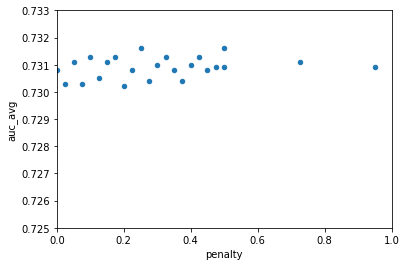

In [61]:
res.plot.scatter('penalty', 'auc_avg', xlim=(0, 1), ylim=(0.725, 0.733))

In [36]:
res = res.loc[res.md_width>100]

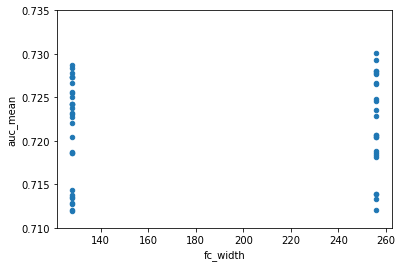

In [11]:
res.plot.scatter('fc_width', 'auc_mean', ylim=(0.71, 0.735))

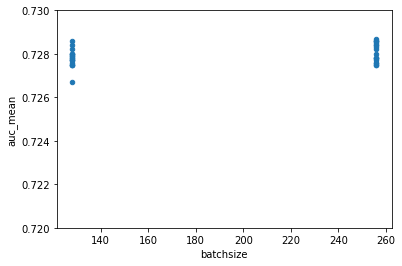

In [40]:
res.plot.scatter('batchsize', 'auc_mean', ylim=(0.72, 0.73))

In [17]:
res.loc[res.auc_mean==res.auc_mean.max(), ['embed_file', 'y_pred_file', 'auc_mean']]

embed_file                             y_pred_file  auc_mean
5  all/embed_mat_pen6e-7.npy  output/y_pred_mat18_08_30_01_34_24.npy    0.7282
8  all/embed_mat_pen9e-7.npy  output/y_pred_mat18_08_30_03_43_48.npy    0.7282

In [43]:
res.loc[res.auc_mean>0.7285, ]

model_name  code_embed_dim  hosp_embed_dim  fc_width  md_width     lr1  \
26     setsum             100               1       128       128  0.0002   
35     setsum             100               1       128       256  0.0002   
24     setsum             100               1       128       128  0.0002   
34     setsum             100               1       128       256  0.0002   
27     setsum             100               1       128       128  0.0002   

        lr2  dropout  batchsize                    embed_file  \
26  0.00002      0.1        128  all/embed_mat_pen_2_1e-6.npy   
35  0.00005      0.3        256  all/embed_mat_pen_2_1e-6.npy   
24  0.00001      0.1        256  all/embed_mat_pen_2_1e-6.npy   
34  0.00005      0.1        256  all/embed_mat_pen_2_1e-6.npy   
27  0.00002      0.5        256  all/embed_mat_pen_2_1e-6.npy   

                   data_file  sep_dx1  tst_seed  n_fold  auc_mean  auc_cil  \
26  cohorts/ami/ami_pred.csv        0         0       7    0.7286  (0.7275   
35  cohorts/ami/ami_pred.csv        0         0       7    0.7286  (0.7278   
24  cohorts/ami/ami_pred.csv        0         0       7    0.7287  (0.7275   
34  cohorts/ami/ami_pred.csv        0         0       7    0.7286  (0.7271   
27  cohorts/ami/ami_pred.csv        0         0       7    0.7286  (0.7278   

     auc_cih                             y_pred_file  
26   0.7298)  output/y_pred_mat18_08_30_11_48_48.npy  
35   0.7295)  output/y_pred_mat18_08_30_06_42_42.npy  
24   0.7300)  output/y_pred_mat18_08_30_11_59_33.npy  
34   0.7301)  output/y_pred_mat18_08_30_08_38_31.npy  
27   0.7294)  output/y_pred_mat18_08_30_12_04_01.npy

### Embedding + NN  with subset of codes

In [4]:
res = pd.DataFrame()

In [4]:
for job_ind in range(4):
    df = pd.read_csv('output/ht_result1001_'+str(job_ind)+'.csv', 
                     names=['model_name', 'code_embed_dim', 'hosp_embed_dim', 'fc_width', 'md_width', 'lr1', 'lr2', 'dropout',
                            'batchsize', 'embed_file', 'cohort', 'tst_seed', 'n_fold', 'penalty', 'penalty_metric', 'count_cap', 
                            'DX_rarecutpoint', 'PR_rarecutpoint', 'auc_mean', 'auc_avg', 'auc_freeze', 'y_pred_file'], index_col=None)
    res = pd.concat([res, df])

In [4]:
res = res.loc[res.model_name=='embed_sum']

In [8]:
res

model_name  code_embed_dim  hosp_embed_dim  fc_width  md_width     lr1  \
0    setsum_nn             200               1      1024       256  0.0002   
1    setsum_nn             200               1      1024       256  0.0002   
2    setsum_nn             200               1      1024       256  0.0002   
3    setsum_nn             200               1       512       256  0.0002   
4    setsum_nn             200               1       512       256  0.0002   
5    setsum_nn             300               1      1024       256  0.0002   
6    setsum_nn             300               1      1024       256  0.0002   
7    setsum_nn             300               1      1024       256  0.0002   
8    setsum_nn             300               1      1024       256  0.0002   
9    setsum_nn             300               1      1024       256  0.0002   
10   setsum_nn             200               1      1024       128  0.0002   
11   setsum_nn             200               1      1024       128  0.0002   
12   setsum_nn             200               1      1024       128  0.0002   
13   setsum_nn             200               1      1024       256  0.0002   
14   setsum_nn             200               1      1024       256  0.0002   
15   setsum_nn             200               1       512       256  0.0002   
16   setsum_nn             200               1       512       256  0.0002   
17   setsum_nn             200               1       512       256  0.0002   
18   setsum_nn             300               1       512       128  0.0002   
19   setsum_nn             300               1       512       128  0.0002   
20   setsum_nn             200               1      1024       256  0.0002   
21   setsum_nn             200               1      1024       256  0.0002   
22   setsum_nn             200               1      1024       256  0.0002   
23   setsum_nn             300               1      1024       256  0.0002   
24   setsum_nn             300               1      1024       256  0.0002   
25   setsum_nn             200               1       512       128  0.0002   
26   setsum_nn             200               1       512       128  0.0002   
27   setsum_nn             200               1       512       128  0.0002   
28   setsum_nn             300               1       512       128  0.0002   
29   setsum_nn             300               1       512       128  0.0002   
..         ...             ...             ...       ...       ...     ...   
300  setsum_nn             200               1       512       128  0.0002   
301  setsum_nn             200               1       512       128  0.0002   
302  setsum_nn             200               1       512       128  0.0002   
303  setsum_nn             200               1       512       128  0.0002   
304  setsum_nn             200               1       512       128  0.0002   
305  setsum_nn             300               1      1024       128  0.0002   
306  setsum_nn             300               1      1024       128  0.0002   
307  setsum_nn             300               1      1024       128  0.0002   
308  setsum_nn             200               1      1024       128  0.0002   
309  setsum_nn             200               1      1024       128  0.0002   
310  setsum_nn             200               1       512       128  0.0002   
311  setsum_nn             200               1       512       128  0.0002   
312  setsum_nn             200               1       512       128  0.0002   
313  setsum_nn             300               1       512       128  0.0002   
314  setsum_nn             300               1       512       128  0.0002   
315  setsum_nn             200               1      1024       256  0.0002   
316  setsum_nn             200               1      1024       256  0.0002   
317  setsum_nn             200               1      1024       256  0.0002   
318  setsum_nn             300               1      1024       256  0.0002   
319  setsum_nn            

In [10]:
res_grouped = res.groupby(['code_embed_dim', 'fc_width', 'md_width', 'penalty', 'batchsize', 'count_cap'])

In [11]:
res_grouped[['auc_freeze', 'auc_mean', 'auc_avg']].agg(['mean', 'count'])

auc_freeze        \
                                                                   mean count   
code_embed_dim fc_width md_width penalty batchsize count_cap                    
200            512      128      0.0     256       20          0.716274    20   
                                         512       0           0.716043    20   
                        256      0.0     256       5           0.716623    10   
               1024     128      0.0     256       5           0.716075    20   
                                                   20          0.716289    10   
                                         512       5           0.716510    10   
300            1024     256      0.0     512       0           0.715975    20   

                                                              auc_mean        \
                                                                  mean count   
code_embed_dim fc_width md_width penalty batchsize count_cap                   
200            512      128      0.0     256       20         0.717040    20   
                                         512       0          0.716647    20   
                        256      0.0     256       5          0.717226    10   
               1024     128      0.0     256       5          0.716861    20   
                                                   20         0.717320    10   
                                         512       5          0.717119    10   
300            1024     256      0.0     512       0          0.716324    20   

                                                               auc_avg        
                                                                  mean count  
code_embed_dim fc_width md_width penalty batchsize count_cap                  
200            512      128      0.0     256       20         0.719784    20  
                                         512       0          0.719599    20  
                        256      0.0     256       5          0.719562    10  
               1024     128      0.0     256       5          0.719762    20  
                                                   20         0.719926    10  
                                         512       5          0.720019    10  
300            1024     256      0.0     512       0          0.718935    20

In [16]:
res.to_csv('output/ht_result1003embed_nn_sub.csv', index=False)

In [5]:
res = pd.read_csv('output/ht_result1003embed_nn_sub.csv')

In [9]:
res = res.loc[res.penalty==0]

### OHE models

In [34]:
res = pd.DataFrame()

In [35]:
for job_ind in range(1):
    df = pd.read_csv('output/ht_result0925_'+str(job_ind)+'.csv', 
                     names=['fc_width1', 'fc_width2', 'lr', 'dropout', 'batchsize', 'cohort', 'tst_seed', 'n_fold', 
                            'DX_rarecutpoint', 'PR_rarecutpoint', 'auc_mean', 'auc_avg', 'y_pred_file'], index_col=None)
    res = pd.concat([res, df])

In [36]:
res

fc_width1  fc_width2      lr  dropout  batchsize cohort  tst_seed  n_fold  \
0        1024        256  0.0001      0.3        512    ami         0       5   
1        1024        256  0.0001      0.3        512    chf         0       5   
2        1024        256  0.0001      0.3        512    pna         0       5   
3        1024        256  0.0001      0.3        512    ami         1       5   
4        1024        256  0.0001      0.3        512    chf         1       5   
5        1024        256  0.0001      0.3        512    pna         1       5   
6        1024        256  0.0001      0.3        512    ami         2       5   
7        1024        256  0.0001      0.3        512    chf         2       5   
8        1024        256  0.0001      0.3        512    pna         2       5   
9        1024        256  0.0001      0.3        512    ami         3       5   
10       1024        256  0.0001      0.3        512    chf         3       5   
11       1024        256  0.0001      0.3        512    pna         3       5   
12       1024        256  0.0001      0.3        512    ami         4       5   
13       1024        256  0.0001      0.3        512    chf         4       5   
14       1024        256  0.0001      0.3        512    pna         4       5   
15       1024        256  0.0001      0.3        512    ami         5       5   
16       1024        256  0.0001      0.3        512    chf         5       5   
17       1024        256  0.0001      0.3        512    pna         5       5   
18       1024        256  0.0001      0.3        512    ami         6       5   
19       1024        256  0.0001      0.3        512    chf         6       5   
20       1024        256  0.0001      0.3        512    pna         6       5   
21       1024        256  0.0001      0.3        512    ami         7       5   
22       1024        256  0.0001      0.3        512    chf         7       5   
23       1024        256  0.0001      0.3        512    pna         7       5   
24       1024        256  0.0001      0.3        512    ami         8       5   
25       1024        256  0.0001      0.3        512    chf         8       5   
26       1024        256  0.0001      0.3        512    pna         8       5   
27       1024        256  0.0001      0.3        512    ami         9       5   
28       1024        256  0.0001      0.3        512    chf         9       5   
29       1024        256  0.0001      0.3        512    pna         9       5   

    DX_rarecutpoint  PR_rarecutpoint  auc_mean  auc_avg  \
0                10               10   0.71339  0.71610   
1                10               10   0.61783  0.62129   
2                10               10   0.66755  0.67043   
3                10               10   0.71938  0.72227   
4                10               10   0.62258  0.62686   
5                10               10   0.67248  0.67472   
6                10               10   0.70725  0.71013   
7                10               10   0.62727  0.63157   
8                10               10   0.66761  0.67088   
9                10               10   0.71382  0.71638   
10               10               10   0.62566  0.62988   
11               10               10   0.67220  0.67531   
12               10               10   0.71510  0.71780   
13               10               10   0.62636  0.62996   
14               10               10   0.66816  0.67011   
15               10               10   0.70978  0.71214   
16               10               10   0.62471  0.62859   
17               10               10   0.65954  0.66240   
18               10               10   0.70653  0.70901   
19               10               10   0.62151  0.62525   
20               10               10   0.66753  0.66960   
21               10               10   0.71184  0.71453   
22               10               10   0.63224  0.63636   
23               10               10   0.66699  0.66899   
24               

In [37]:
res_grouped = res.groupby(['cohort'])

In [39]:
res_grouped[['auc_mean', 'auc_avg']].agg(['mean', 'count'])

auc_mean         auc_avg      
            mean count      mean count
cohort                                
ami     0.713779    10  0.716431    10
chf     0.625169    10  0.629076    10
pna     0.667465    10  0.670033    10

In [40]:
for n, g in res_grouped:
    print(n, 'mean: {0:.4f} ({1:.4f})'.format(g.auc_mean.mean(), g.auc_mean.std()/np.sqrt(len(g))), 
         'avg: {0:.4f} ({1:.4f})'.format(g.auc_avg.mean(), g.auc_avg.std()/np.sqrt(len(g))))

ami mean: 0.7138 (0.0016) avg: 0.7164 (0.0016)
chf mean: 0.6252 (0.0013) avg: 0.6291 (0.0013)
pna mean: 0.6675 (0.0012) avg: 0.6700 (0.0011)
